In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MBTI_FILE = r"C:\Hwan\ML_Work\project\mbti_labels.csv"
MBTI_INFO = r"C:\Hwan\ML_Work\project\user_info.csv"

In [3]:
MBTI = pd.read_csv(MBTI_FILE)

In [4]:
MBTI["mbti_personality"].value_counts()

mbti_personality
infj    917
intj    905
enfp    900
infp    899
enfj    723
intp    712
entj    677
entp    586
isfj    420
istj    342
esfj    236
isfp    232
estj    221
istp    209
esfp    202
estp    147
Name: count, dtype: int64

In [5]:
info = pd.read_csv(MBTI_INFO)


In [6]:
info[["average_tweet_length","average_retweet_count","average_favorite_count","average_hashtag_count","average_url_count","average_mentions_count","average_media_count"]]

,average_tweet_length,average_retweet_count,average_favorite_count,average_hashtag_count,average_url_count,average_mentions_count,average_media_count
0,11.785000,3003.580000,0.980000,0.250000,0.185000,0.695000,0.570000
1,16.150000,3718.745000,1.695000,0.410000,0.215000,0.780000,0.170000
2,9.668342,3722.211055,0.824121,0.356784,0.195980,0.854271,0.201005
3,14.718750,10028.718750,1.526042,0.401042,0.130208,0.906250,0.401042
4,7.655000,827.370000,2.190000,0.080000,0.055000,0.635000,0.495000
...,...,...,...,...,...,...,...
8323,16.804020,71.497487,2.422111,0.075377,0.673367,1.316583,0.035176
8324,17.844221,6.628141,0.025126,1.291457,0.000000,1.301508,0.010050
8325,13.504587,40.119266,0.110092,0.422018,0.110092,0.899083,0.073394
8326,14.675676,3.202703,1.500000,0.391892,0.108108,0.162162,0.351351


In [7]:
info[["total_retweet_count","total_favorite_count","total_hashtag_count","total_url_count","total_mentions_count","total_media_count"]]

,total_retweet_count,total_favorite_count,total_hashtag_count,total_url_count,total_mentions_count,total_media_count
0,600716,196,50,37,139,114
1,743749,339,82,43,156,34
2,740720,164,71,39,170,40
3,1925514,293,77,25,174,77
4,165474,438,16,11,127,99
...,...,...,...,...,...,...
8323,14228,482,15,134,262,7
8324,1319,5,257,0,259,2
8325,4373,12,46,12,98,8
8326,237,111,29,8,12,26


#### TotalData를 가지고 MinMax 하기로 결정

In [8]:
featureDF = pd.read_csv(r"C:\Hwan\ML_Work\project\feature.csv")
targetDF = pd.read_csv(r"C:\Hwan\ML_Work\project\target.csv")

In [9]:
featureDF

,total_retweet_count,total_favorite_count,total_hashtag_count,total_url_count,total_mentions_count,total_media_count,number_of_tweets_scraped
0,600716,196,50,37,139,114,200.0
1,743749,339,82,43,156,34,200.0
2,740720,164,71,39,170,40,199.0
3,1925514,293,77,25,174,77,192.0
4,165474,438,16,11,127,99,200.0
...,...,...,...,...,...,...,...
8323,14228,482,15,134,262,7,199.0
8324,1319,5,257,0,259,2,199.0
8325,4373,12,46,12,98,8,109.0
8326,237,111,29,8,12,26,74.0


In [10]:
targetDF

,mbti_personality
0,infp
1,infp
2,infp
3,infp
4,infp
...,...
8323,estj
8324,estj
8325,estj
8326,estj


In [11]:
featureDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_retweet_count       8328 non-null   int64  
 1   total_favorite_count      8328 non-null   int64  
 2   total_hashtag_count       8328 non-null   int64  
 3   total_url_count           8328 non-null   int64  
 4   total_mentions_count      8328 non-null   int64  
 5   total_media_count         8328 non-null   int64  
 6   number_of_tweets_scraped  8328 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 455.6 KB


In [12]:
targetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8328 entries, 0 to 8327
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mbti_personality  8328 non-null   object
dtypes: object(1)
memory usage: 65.2+ KB


In [13]:
# 산점도
featureDF.corr()

,total_retweet_count,total_favorite_count,total_hashtag_count,total_url_count,total_mentions_count,total_media_count,number_of_tweets_scraped
total_retweet_count,1.000000,-0.010027,-0.069789,-0.223934,-0.002663,0.282906,-0.018070
total_favorite_count,-0.010027,1.000000,-0.016681,-0.015861,-0.030123,0.045581,0.001925
total_hashtag_count,-0.069789,-0.016681,1.000000,0.319363,-0.012467,0.041524,0.028099
total_url_count,-0.223934,-0.015861,0.319363,1.000000,-0.073788,-0.261832,0.184737
total_mentions_count,-0.002663,-0.030123,-0.012467,-0.073788,1.000000,-0.051649,0.240165
total_media_count,0.282906,0.045581,0.041524,-0.261832,-0.051649,1.000000,0.064040
number_of_tweets_scraped,-0.018070,0.001925,0.028099,0.184737,0.240165,0.064040,1.000000


### RandomForest 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [15]:
random_forest = RandomForestClassifier()

In [16]:
targetSR = targetDF["mbti_personality"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, stratify=targetSR, random_state=38)

In [18]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
pre_ = random_forest.predict(X_test)

In [20]:
Accuracy = accuracy_score(y_test, pre_)
print(f'[트위터 분석을 통한 랜덤 포레스트 정확도]: {Accuracy}')

[트위터 분석을 통한 랜덤 포레스트 정확도]: 0.11824729891956783


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['infj', 'isfj', 'enfj', ..., 'infj', 'intp', 'enfp'], dtype=object)

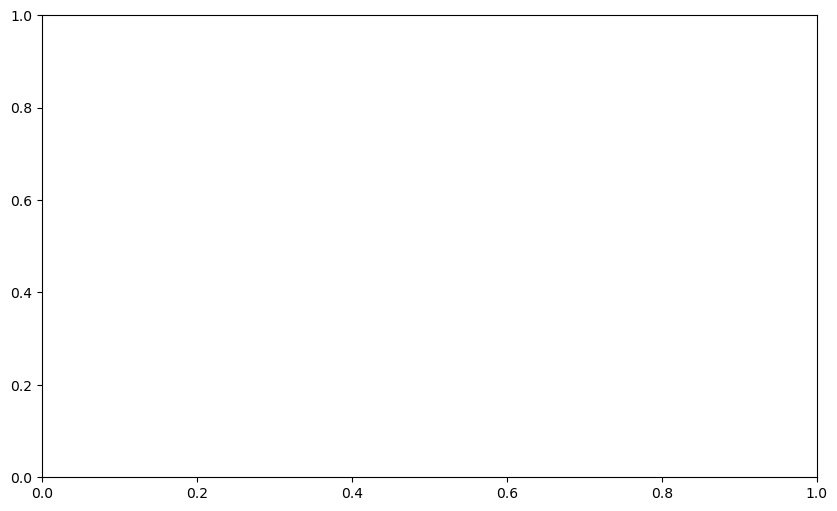

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['total_retweet_count'], X_test['total_favorite_count'], c=pre_, cmap='viridis', alpha=0.6)
plt.colorbar(label='예측된 MBTI')
plt.xlabel('총 리트윗 수')
plt.ylabel('총 좋아요 수')
plt.title('총 리트윗 수와 좋아요 수에 따른 예측된 MBTI 분류')
plt.show()

#### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
decisionTree = DecisionTreeClassifier(random_state=38)

In [24]:
import seaborn as sns
import koreanize_matplotlib 

In [25]:
featruecorr = featureDF.corr()

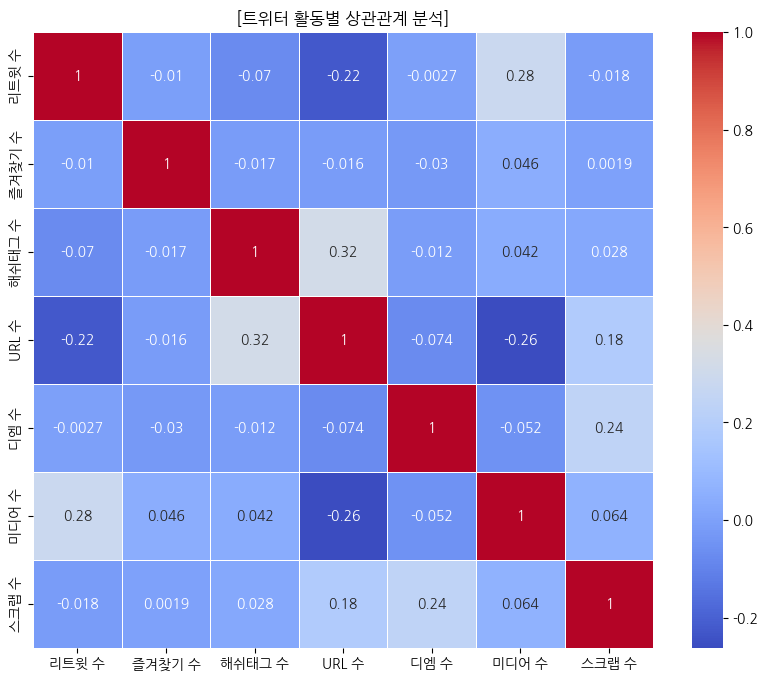

In [26]:
title = ["리트윗 수", "즐겨찾기 수", "해쉬태그 수", "URL 수", "디엠 수", "미디어 수", "스크랩 수"]
featruecorr.columns = title
featruecorr.index = title

plt.figure(figsize=(10, 8))
sns.heatmap(featruecorr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('[트위터 활동별 상관관계 분석]')
plt.show()

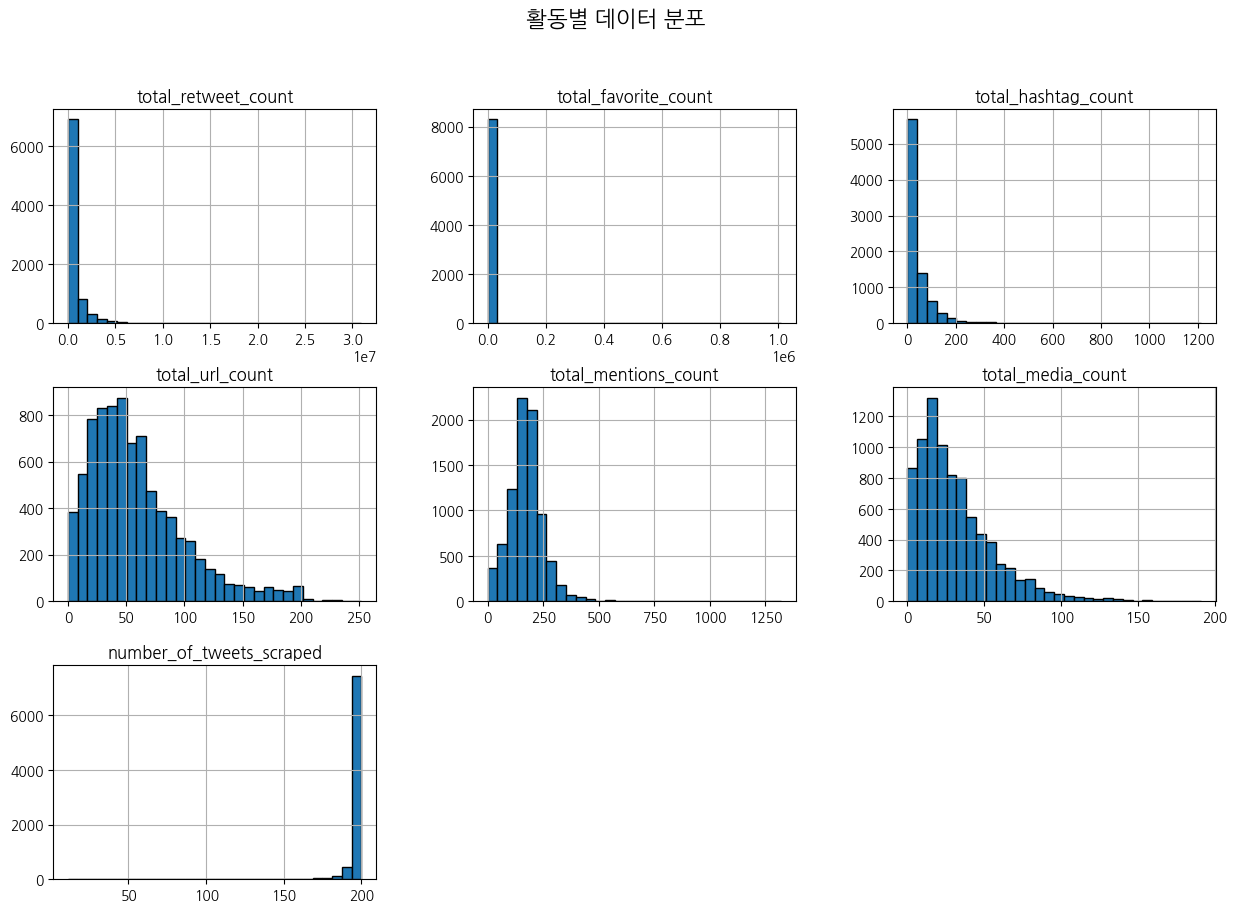

In [27]:
# Data histogram
title = ["리트윗 수", "즐겨찾기 수", "해쉬태그 수", "URL 수", "언급 수", "미디어 수", "스크랩 수"]

featureDF.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('활동별 데이터 분포', size=16)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=38)

In [30]:
modelTree = DecisionTreeClassifier(random_state=38)

In [31]:
# Hyper-parameter
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}


In [32]:
# ---------------------------------------------------------------------------------------------------------------------------

In [33]:
# MBTI 2진법
# 0 = E, S, T, J
# 1 = I, N, F, P

# def split_mbti(mbti):
#     EorI = 0 if mbti[0] == 'E' else 1  
#     SorN = 0 if mbti[1] == 'S' else 1  
#     TorF = 0 if mbti[2] == 'T' else 1 
#     PorJ = 0 if mbti[3] == 'P' else 1  
#     return [EorI, SorN, TorF, PorJ]

# targetDF[['EorI', 'SorN', 'TorF', 'PorJ']] = targetDF['mbti_personality'].apply(lambda x: pd.Series(split_mbti(x)))

In [34]:
# targetDF

In [32]:
targetDF = pd.read_csv(r"C:\Hwan\ML_Work\project\target_2.csv")

In [33]:
targetDF

,mbti_personality,ie,ns,ft,jp
0,infp,i,n,f,p
1,infp,i,n,f,p
2,infp,i,n,f,p
3,infp,i,n,f,p
4,infp,i,n,f,p
...,...,...,...,...,...
8323,estj,e,s,t,j
8324,estj,e,s,t,j
8325,estj,e,s,t,j
8326,estj,e,s,t,j


In [34]:
targetDF.drop("mbti_personality", axis = 1 , inplace=True)
TF = pd.get_dummies(targetDF)

In [35]:
TF.replace(True, 1, inplace = True)
TF.replace(False, 0, inplace = True)

C:\Users\hwans\AppData\Local\Temp\ipykernel_1436\5596395.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TF.replace(False, 0, inplace = True)


In [36]:
TF

,ie_e,ie_i,ns_n,ns_s,ft_f,ft_t,jp_j,jp_p
0,0,1,1,0,1,0,0,1
1,0,1,1,0,1,0,0,1
2,0,1,1,0,1,0,0,1
3,0,1,1,0,1,0,0,1
4,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
8323,1,0,0,1,0,1,1,0
8324,1,0,0,1,0,1,1,0
8325,1,0,0,1,0,1,1,0
8326,1,0,0,1,0,1,1,0


In [37]:
targerSREI = targetDF["ie"]
targetSRSN = targetDF["ns"]
targetSRTF = targetDF["ft"]
targerSRJP = targetDF["jp"]

In [38]:
targerSREI

0       i
1       i
2       i
3       i
4       i
       ..
8323    e
8324    e
8325    e
8326    e
8327    e
Name: ie, Length: 8328, dtype: object

In [39]:
from sklearn.tree import plot_tree

--- IE_I Grid Search 결과 ---
최적의 max_depth: 3
최적의 min_samples_split: 2
최적 모델의 교차 검증 정확도: 0.5600
테스트 데이터 정확도: 0.5600
튜닝 후 성능:
train 데이터 정확도: 0.5813569498649054
test 데이터 정확도: 0.5600
---[트위터 사용자별 MBTI 특성 의사결정트리] ---
오차행렬
[[527 410]
 [384 345]]


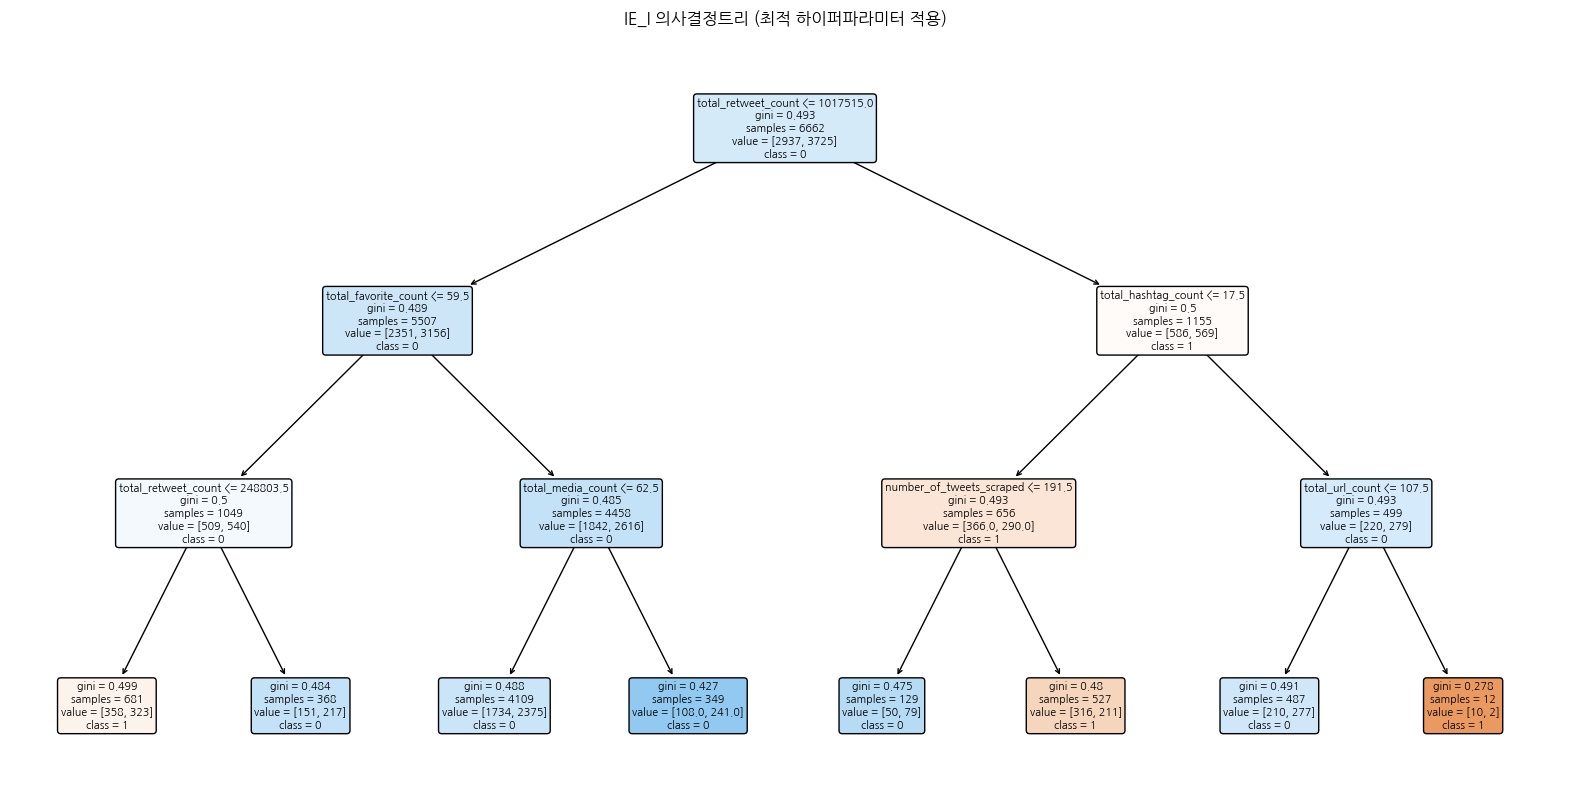

--- NS_N Grid Search 결과 ---
최적의 max_depth: 3
최적의 min_samples_split: 2
최적 모델의 교차 검증 정확도: 0.7585
테스트 데이터 정확도: 0.7575
튜닝 후 성능:
train 데이터 정확도: 0.7608826178324828
test 데이터 정확도: 0.7575
---[트위터 사용자별 MBTI 특성 의사결정트리] ---
오차행렬
[[933 262]
 [344 127]]


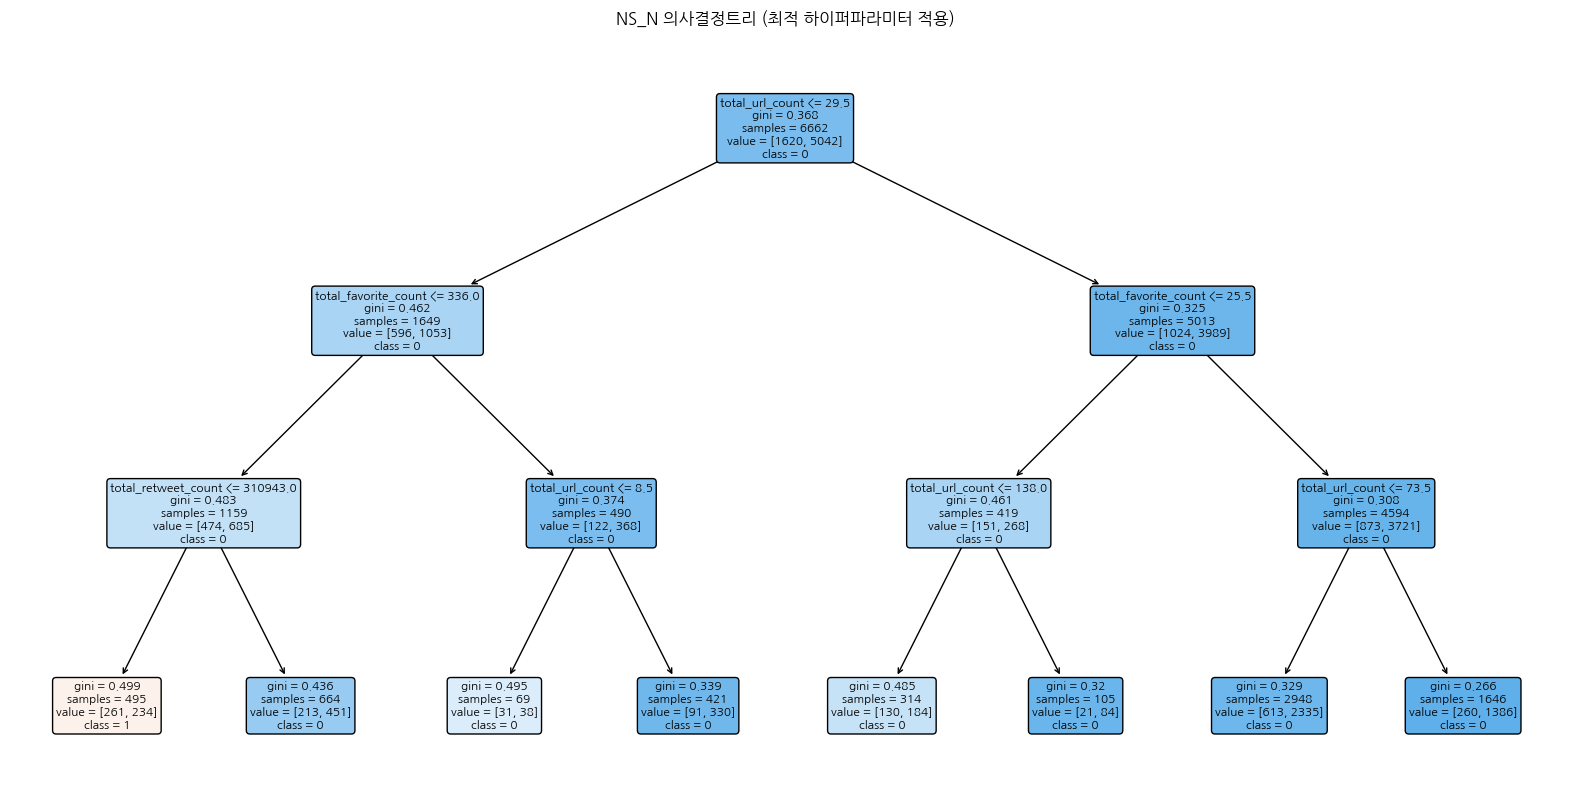

--- FT_F Grid Search 결과 ---
최적의 max_depth: 5
최적의 min_samples_split: 2
최적 모델의 교차 검증 정확도: 0.5602
테스트 데이터 정확도: 0.5678
튜닝 후 성능:
train 데이터 정확도: 0.5944160912638847
test 데이터 정확도: 0.5678
---[트위터 사용자별 MBTI 특성 의사결정트리] ---
오차행렬
[[485 423]
 [419 339]]


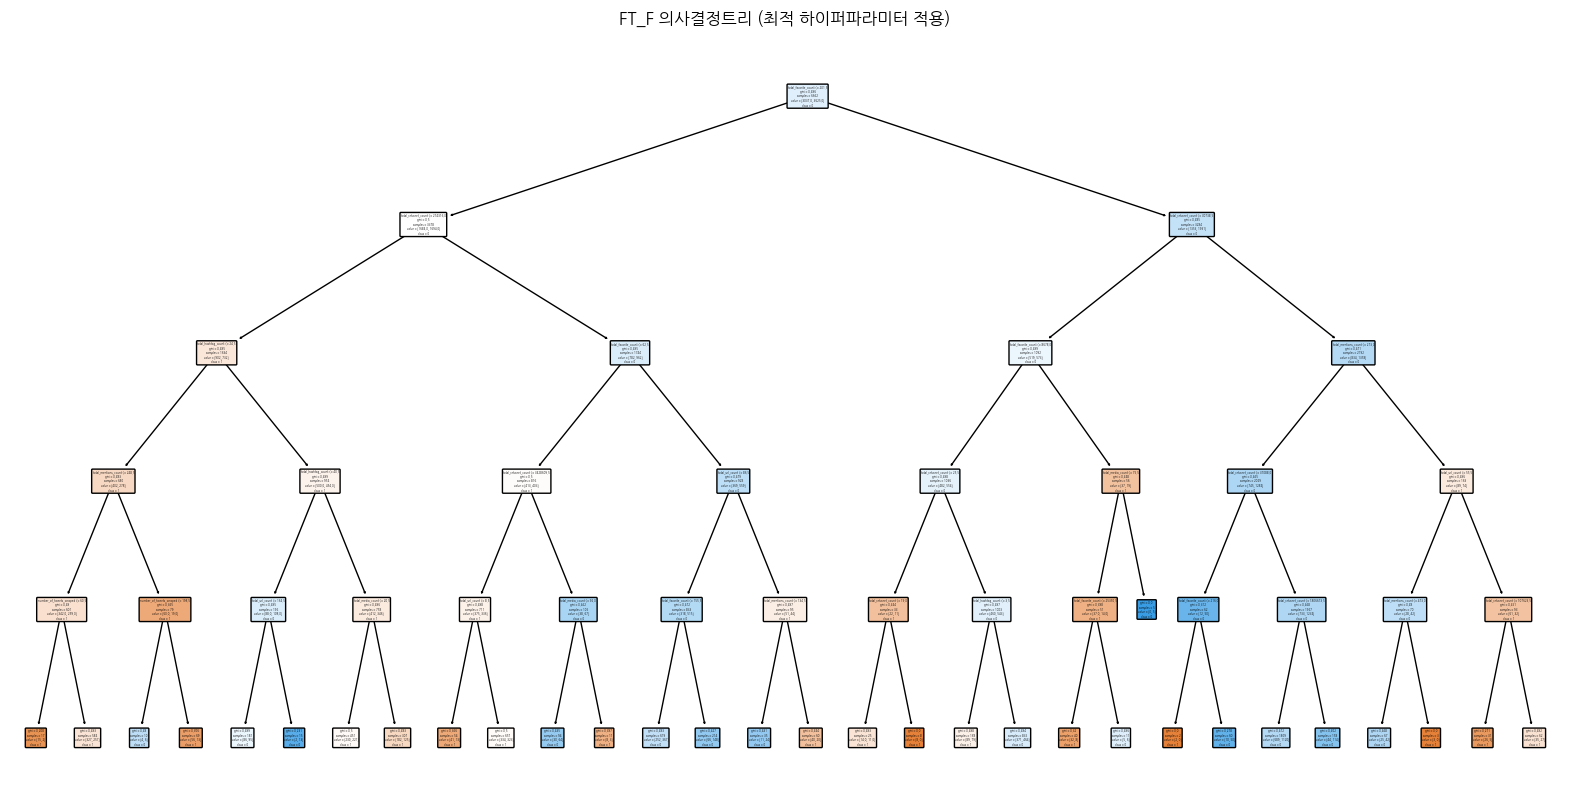

--- JP_J Grid Search 결과 ---
최적의 max_depth: 3
최적의 min_samples_split: 2
최적 모델의 교차 검증 정확도: 0.5413
테스트 데이터 정확도: 0.5456
튜닝 후 성능:
train 데이터 정확도: 0.5546382467727409
test 데이터 정확도: 0.5456
---[트위터 사용자별 MBTI 특성 의사결정트리] ---
오차행렬
[[483 401]
 [398 384]]


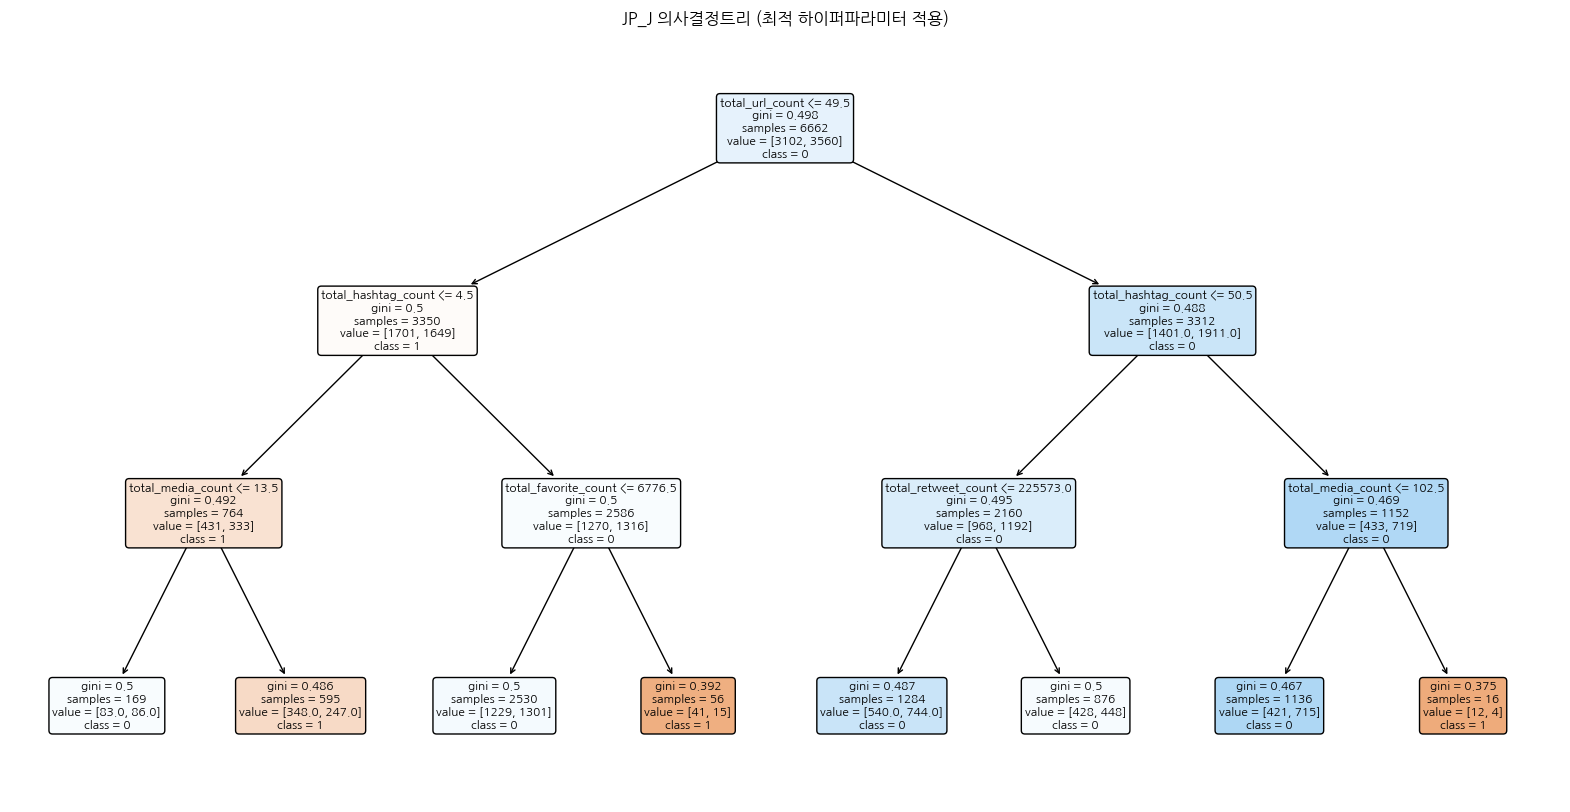

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

target_columns = ['ie_i', 'ns_n', 'ft_f', 'jp_j']

param_grid = {
    'max_depth': [3, 5, 7, 10],  
    'min_samples_split': [2, 5, 10, 20] }

for column in target_columns:
    y = TF[column]
    
    X_train, X_test, y_train, y_test = train_test_split(featureDF, y, test_size=0.2, random_state=38)
    
    dt_model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
    
    grid_search.fit(X_train, y_train)
    
    print(f'--- {column.upper()} Grid Search 결과 ---')
    print(f'최적의 max_depth: {grid_search.best_params_["max_depth"]}')
    print(f'최적의 min_samples_split: {grid_search.best_params_["min_samples_split"]}')
    print(f'최적 모델의 교차 검증 정확도: {grid_search.best_score_:.4f}')
    
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print(f'테스트 데이터 정확도: {test_accuracy:.4f}')
    
    print("튜닝 후 성능:")
    print(f"train 데이터 정확도: {best_model.score(X_train, y_train)}")
    print(f"test 데이터 정확도: {test_accuracy:.4f}")
    
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train) 

    pre_ = dt_model.predict(X_test)

    cm = confusion_matrix(y_test, pre_)
    tp = cm[1, 1]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tn = cm[0, 0]
    custom_cm = np.array([[tp, fp], [fn, tn]])
    print(f'---[트위터 사용자별 MBTI 특성 의사결정트리] ---')
    print('오차행렬')
    print(custom_cm)
    
    plt.figure(figsize=(20, 10))
    plot_tree(best_model, filled=True, feature_names=featureDF.columns, class_names=["1","0"], rounded=True)
    plt.title(f'{column.upper()} 의사결정트리 (최적 하이퍼파라미터 적용)')
    plt.show()


In [40]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import os

# 타겟 컬럼 (MBTI 요소)
target_columns = ['ie_i', 'ns_n', 'ft_f', 'jp_j']

# 하이퍼파라미터 설정
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# 모델 저장 경로 설정
model_directory = "mbti_models"
os.makedirs(model_directory, exist_ok=True)

# 각 MBTI 요소에 대해 개별 모델 학습 및 저장
for column in target_columns:
    # 데이터 분할
    y = TF[column]
    X_train, X_test, y_train, y_test = train_test_split(featureDF, y, test_size=0.2, random_state=38)

    # Grid Search를 사용한 모델 학습
    dt_model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # 최적 모델 선택 및 저장
    best_model = grid_search.best_estimator_
    model_path = os.path.join(model_directory, f"best_model_{column}.pkl")
    with open(model_path, 'wb') as f:
        pickle.dump(best_model, f)
    print(f"{column.upper()} 모델이 저장되었습니다: {model_path}")

# 저장된 모델 불러오기 및 예측 수행 예시
loaded_models = {}
for column in target_columns:
    model_path = os.path.join(model_directory, f"best_model_{column}.pkl")
    with open(model_path, 'rb') as f:
        loaded_models[column] = pickle.load(f)
    print(f"{column.upper()} 모델이 로드되었습니다: {model_path}")

# 예시 입력 데이터 (예: X_test의 첫 번째 샘플)
x_sample = X_test.iloc[0].values.reshape(1, -1)

# 각 요소에 대해 예측 수행
predictions = {}
for column, model in loaded_models.items():
    predictions[column] = model.predict(x_sample)[0]

# 예측 결과 출력
print("\nMBTI 예측 결과:")
for column, prediction in predictions.items():
    print(f"{column.upper()}: {prediction}")


IE_I 모델이 저장되었습니다: mbti_models\best_model_ie_i.pkl
NS_N 모델이 저장되었습니다: mbti_models\best_model_ns_n.pkl
FT_F 모델이 저장되었습니다: mbti_models\best_model_ft_f.pkl
JP_J 모델이 저장되었습니다: mbti_models\best_model_jp_j.pkl
IE_I 모델이 로드되었습니다: mbti_models\best_model_ie_i.pkl
NS_N 모델이 로드되었습니다: mbti_models\best_model_ns_n.pkl
FT_F 모델이 로드되었습니다: mbti_models\best_model_ft_f.pkl
JP_J 모델이 로드되었습니다: mbti_models\best_model_jp_j.pkl

MBTI 예측 결과:
IE_I: 1
NS_N: 1
FT_F: 0
JP_J: 1


c:\Users\hwans\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\hwans\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\hwans\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\hwans\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [49]:
import os
from sklearn.metrics import accuracy_score, f1_score
import torch

# 모델 파일 저장 관련 설정
SAVE_PATH = './cgi-bin/'
os.makedirs(SAVE_PATH, exist_ok=True)  # 저장 경로가 없으면 생성

SAVE_FILE = SAVE_PATH + 'model_train_wb.pth'  # 모델 파라미터 저장 파일명
SAVE_MODEL = SAVE_PATH + 'model_all.pth'  # 모델 전체 저장 파일명

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
import time  # 딜레이 추가
import pickle

# 파라미터 범위 확대
param_grid = {
    'max_depth': [3, 5, 7, 10, 12],  
    'min_samples_split': [2, 5, 10, 20, 30]
}

SCORE_HISTORY = [[], []]
LIMIT_VALUE = 20  # patience 값 증가
EPOCH = 50
BEST_SCORE = 0
PATIENCE_CNT = 0
SAVE_FILE = 'best_model.pkl'

for epoch in range(EPOCH):
    # 모델 설정 및 Grid Search 적용
    dt_model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1')
    
    # 학습
    grid_search.fit(X_train, y_train)
    
    # 예측
    pre_y_train = grid_search.predict(X_train)
    pre_y_test = grid_search.predict(X_test)

    # 성능평가
    score_train = f1_score(y_train, pre_y_train, average='binary')
    score_test = f1_score(y_test, pre_y_test, average='binary')

    # 성능 기록
    SCORE_HISTORY[0].append(score_train)
    SCORE_HISTORY[1].append(score_test)

    print(f' [{epoch}/{EPOCH}]\n [TRAIN] SCORE : {SCORE_HISTORY[0][-1]}')
    print(f' [TEST] SCORE : {SCORE_HISTORY[1][-1]}')

    # 성능 개선 시 모델 저장
    if score_test > BEST_SCORE:
        BEST_SCORE = score_test
        PATIENCE_CNT = 0  # patience 초기화
        print(f"Epoch {epoch}: 성능 개선됨, 모델 저장 중...")

        with open(SAVE_FILE, 'wb') as f:
            pickle.dump(grid_search.best_estimator_, f)  # 최적의 모델 저장
    else:
        PATIENCE_CNT += 1
        print(f"Epoch {epoch}: 성능 개선 없음. Patience = {PATIENCE_CNT}")

    # 조기 종료 조건
    if PATIENCE_CNT >= LIMIT_VALUE:
        print(f"{LIMIT_VALUE} 에포크 동안 성능 개선이 없어 학습을 중단합니다.")
        break

    # 딜레이 추가 (1초)
    time.sleep(1)


 [0/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 0: 성능 개선됨, 모델 저장 중...
 [1/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 1: 성능 개선 없음. Patience = 1
 [2/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 2: 성능 개선 없음. Patience = 2
 [3/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 3: 성능 개선 없음. Patience = 3
 [4/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 4: 성능 개선 없음. Patience = 4
 [5/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 5: 성능 개선 없음. Patience = 5
 [6/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 6: 성능 개선 없음. Patience = 6
 [7/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 7: 성능 개선 없음. Patience = 7
 [8/50]
 [TRAIN] SCORE : 0.6894819466248038
 [TEST] SCORE : 0.6841885690446391
Epoch 8: 성능 개선 없음. Patience = 8
 [9/5

In [53]:
import pickle
from sklearn.tree import DecisionTreeClassifier
import os

# 모델 학습 후
model = DecisionTreeClassifier()
model.fit(X_train, y_train) 

# 모델을 저장할 경로 확인 (현재 디렉토리에 저장되는 경우)
model_path = os.path.abspath('best_model.pkl')  # 절대 경로로 변환
print(f"모델이 저장된 경로: {model_path}")

# 모델을 저장
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

모델이 저장된 경로: c:\Hwan\ML_Work\project\best_model.pkl


In [ ]:
# target_columns = ['ie_i', 'ns_n', 'ft_f', 'jp_j']

# param_grid = {'max_depth': [3, 5, 7, 10],  
#     'min_samples_split': [2, 5, 10, 20]}

# for column in target_columns:
#     y = TF[column]

#     X_train, X_test, y_train, y_test = train_test_split(featureDF, y, test_size=0.2, random_state=38)
    
#     dt_model = DecisionTreeClassifier(random_state=38, max_depth=4)
#     dt_model.fit(X_train, y_train)

#     grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
    
#     grid_search.fit(X_train, y_train)
    
# print(f'--- {column.upper()} Grid Search 결과 ---')
# print(f'최적의 max_depth: {grid_search.best_params_["max_depth"]}')
# print(f'최적의 min_samples_split: {grid_search.best_params_["min_samples_split"]}')
# print(f'최적 모델의 정확도: {grid_search.best_score_:.4f}')

# best_model = grid_search.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# print(f'테스트 데이터 정확도: {test_accuracy:.4f}')
# print('\n')

# print("튜닝 전")
# print(f"train : {best_model.score(X_train, y_train)}")
# print(f"test : {best_model.score(X_test, y_test)}")

# plt.figure(figsize=(20, 10))
# plot_tree(dt_model, filled=True, feature_names=featureDF.columns, class_names=['0', '1'], rounded=True)
# plt.title('[트위터 사용자별 MBTI 특성 의사결정트리]')
# plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train) 

pre_ = dt_model.predict(X_test)

cm = confusion_matrix(y_test, pre_)

print(f'---[트위터 사용자별 MBTI 특성 의사결정트리] ---')
print('오차행렬')
print(cm)

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pre_, zero_division=0))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       785
           1       0.55      0.55      0.55       881

    accuracy                           0.52      1666
   macro avg       0.52      0.52      0.52      1666
weighted avg       0.52      0.52      0.52      1666



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import numpy as np

targetDF['ie_binary'] = targetDF['ie'].apply(lambda x: 0 if x == 'e' else 1)
targetDF['ns_binary'] = targetDF['ns'].apply(lambda x: 0 if x == 's' else 1)
targetDF['ft_binary'] = targetDF['ft'].apply(lambda x: 0 if x == 't' else 1)
targetDF['jp_binary'] = targetDF['jp'].apply(lambda x: 0 if x == 'p' else 1)


target_columns = {
    'E/I': 'ie_binary',
    'S/N': 'ns_binary',
    'T/F': 'ft_binary',
    'P/J': 'jp_binary'
}

In [ ]:
for dimension, column in target_columns.items():
    y = targetDF[column]
    
    X_train, X_test, y_train, y_test = train_test_split(featureDF, y, test_size=0.2, random_state=38)

    dt_model = DecisionTreeClassifier(random_state=38)
    dt_model.fit(X_train, y_train)
    
    print(f"X_test : {X_test}, y_test : {y_test}")
    pre_ = dt_model.predict(X_test)

    print(f"train 스코어 값 : {dt_model.score(X_train, y_train)}")

    accuracy = np.mean(pre_ == y_test)
    
    cm = confusion_matrix(y_test, pre_)
    
    # 의사결정 트리 시각화
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, filled=True, feature_names=featureDF.columns, class_names=['0', '1'], rounded=True)
    plt.title(f'{dimension} 의사결정트리')
    plt.show()
    
    # 결과 출력
    print(f'--- {dimension} 분류 결과 ---')
    print(f'정확도: {accuracy * 100:.2f}%')
    print('오차행렬 (Confusion Matrix):')
    print(cm)
    print('\n')